In [14]:
import numpy as np
import pandas as pd
from matplotlib import axes
from matplotlib import pyplot as plt

In [15]:
# Load data into dataframe
df = pd.read_csv("csv/netflix_titles.csv")
df = df.set_index("show_id")

In [16]:
# Handle missing data
# Filled in some missing data with the mode because these values are not necessary for our calculations
df = df.fillna({"director": df["director"].mode()[0], "cast": df["cast"].mode()[0], "country": df["country"].mode()[0]})
# Droped any other rows with missing data that had valuable data missing
df = df.dropna()

In [17]:
# Get just the year from the date_added column and add a new column with the data
df["year_added"] = df["date_added"].map(lambda x: x[-4:])
# Change the data type to int64
df["year_added"] = pd.to_numeric(df["year_added"])

Text(0, 0.5, 'Count')

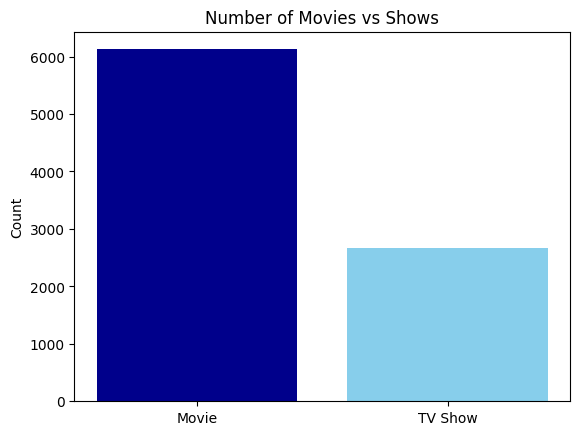

In [18]:
# Number of Movies vs. Shows
# Count the number of movies/shows for each type
grouped_types = df.groupby(["type"])["type"].count()
# Plot the data onto a bar graph
plt.bar(grouped_types.index, grouped_types.values, color=["darkblue", "skyblue"])
plt.title("Number of Movies vs Shows")
plt.ylabel("Count")

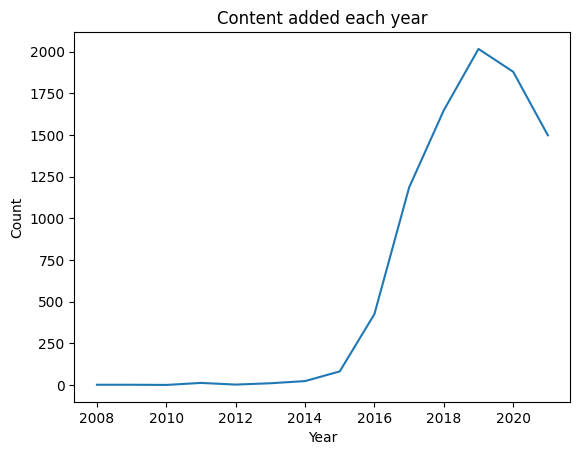

In [19]:
# Line graph: Trend of content added over the years
# group data by the year added and count the number of content
group = df.groupby(["year_added"])["year_added"].count()
# plot the data on a line graph
plt.plot(group.index, group.values)
plt.title("Content added each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

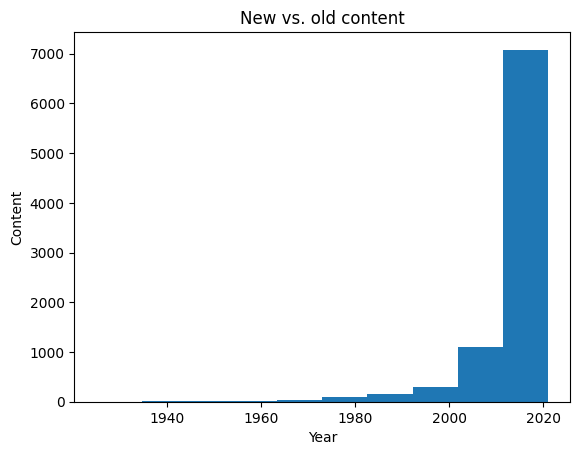

In [20]:
# Explore the amount of new vs. old content
# plot a histogram by release year
plt.hist(df["release_year"])
plt.xlabel("Year")
plt.ylabel("Content")
plt.title("New vs. old content")
plt.show()

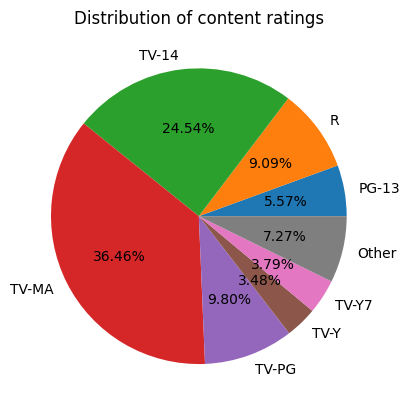

In [21]:
# Count number of content ratings 
group = df.groupby(["rating"])["rating"].count()
# group smaller rating categpries into an other category
group["Other"] = group[group.values <= 300].values.sum()
# remove the values added to other category
group = group[group.values >= 300]

# plot a pie chart
plt.pie(group, labels=group.index, autopct="%1.2f%%")
plt.title("Distribution of content ratings")
plt.show()

In [22]:
# Separate the number from the unit ([60, "minutes"]) and keep the first value (the number)
df["duration"] = df["duration"].str.split().str[0]
# Change the duration to int64
df["duration"] = pd.to_numeric(df["duration"])

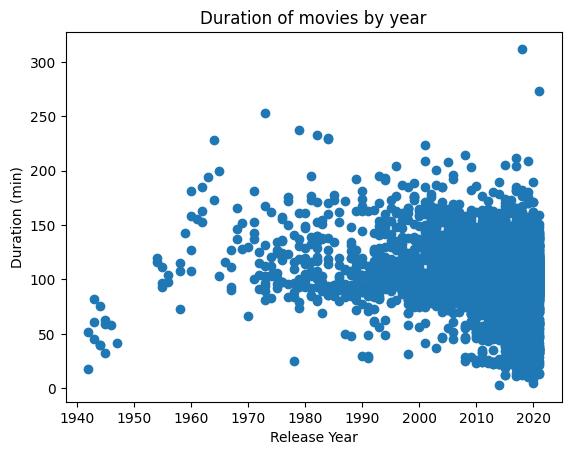

In [23]:
# Take all rows that are type = movie
df_movies = df[df["type"] == "Movie"]

# Plot a scatter plot with the data
plt.scatter(df_movies["release_year"], df_movies["duration"])
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")
plt.title("Duration of movies by year")
plt.show()

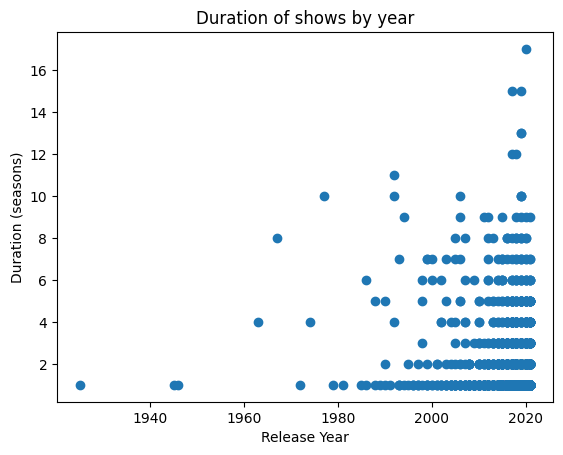

In [24]:
# Take all rows with type = TV show
df_shows = df[df["type"] == "TV Show"]

# Plot a scatter plot with the data
plt.scatter(df_shows["release_year"], df_shows["duration"])
plt.xlabel("Release Year")
plt.ylabel("Duration (seasons)")
plt.title("Duration of shows by year")
plt.show()